In [1]:
import pandas as pd
import numpy as np

In [26]:
proveedores_clustered = pd.read_csv('contrataciones_por_proveedor_clustered.csv',sep=';')

In [27]:
proveedores_clustered["Unidad de medida"].unique()

array(['Unidad', 'Global', 'Acre', 'Metro Cuadrado', 'Kilogramo', nan,
       'Metro Cúbico Por Kilogramo', 'Par', 'Libra', 'Litro', 'Quintal',
       'Tonelada', 'Hora*', 'Metro Cúbico', 'Weber', 'Vatio', 'Barril',
       'Día*', 'Metro', 'Gramo', 'Kilometro', 'Quintal Pequeño', 'Pascal',
       'Miligramo', 'Campamento Provisional De Obras', 'Centimetro',
       'Milimetro', 'Voltio', 'Tesla', 'Centimetro Cubico', 'Pulgada',
       'Yarda'], dtype=object)

In [25]:
proveedores_precio = pd.read_csv('contrataciones_por_proveedor_clustered.csv',sep=';', usecols=['Cantidad', 'Precio unitario', 'Precio total', 'categoria'])

In [5]:
proveedores_clustered.head()

,Unnamed: 0,Proveedor,Entidad Contratante,Código de resolución,Código de contratación,Objeto contractual,Unidad de medida,Cantidad,Descripción compra por ítem,Precio unitario,Precio total,categoria
0,0,MARTINEZ VELASQUEZ ISIDORO RICARDO,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00047,ADQUISICIÓN DE RESPIRADOR CON EFICIENCIA DE FI...,Unidad,2000000.0,RESPIRADOR CON EFICIENCIA DE FILTRACIÓN MÍNIMA...,4.98,9960000.0,6
1,1,SUMINISTROS MEDICOS MANOSALVAS VILLAGOMEZ MV A...,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00045,ADQUISICIÓN DE 900000 PRUEBAS RÁPIDAS PARA LA ...,Unidad,900000.0,PRUEBAS RÁPIDAS PARA LA DETERMINACIÓN DE ANTIC...,7.15,6435000.0,8
2,2,MILENIO LIMPIEZA Y MANTENIMIENTO S.A. MILIMAN,"GUAYAQUIL SIGLO XXI, FUNDACIÓN MUNICIPAL PARA ...",GSXXI-01-2020,GSXXI-01-2020-00001,PRESTACIÓN DE TRAPEADO Y SERVICIOS COMPLEMENTA...,Unidad,1.0,Limpieza en areas regeneradas,4709260.50,4709260.5,7
3,3,CHICAIZA ALVARADO PEDRO GIOVANNY,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00006,ADQUISICIÓN DE MASCARILLAS QUIRURGICAS ELASTIC...,Unidad,6840000.0,MASCARILLA QUIRURGICA ELASTICO TAMAÑO ESTANDAR,0.65,4446000.0,2
4,4,CONSORCIO CASUARINA,MUNICIPALIDAD DE GUAYAQUIL,CE-MIMG-003-2020,CE-MIMG-003-2020-00032,"EJECUCIÓN DE LOS TRABAJOS CIVILES, ESTRUCTURAL...",Unidad,1.0,NaN,4209650.90,4209650.9,8


In [14]:
proveedores_clustered[proveedores_clustered["Unidad de medida"] == "nan"]

,Unnamed: 0,Proveedor,Entidad Contratante,Código de resolución,Código de contratación,Objeto contractual,Unidad de medida,Cantidad,Descripción compra por ítem,Precio unitario,Precio total,categoria


In [10]:
proveedores_clustered["Unidad de medida"].unique()

array(['Unidad', 'Global', 'Acre', 'Metro Cuadrado', 'Kilogramo', nan,
       'Metro Cúbico Por Kilogramo', 'Par', 'Libra', 'Litro', 'Quintal',
       'Tonelada', 'Hora*', 'Metro Cúbico', 'Vatio', 'Barril', 'Día*',
       'Metro', 'Gramo', 'Kilometro', 'Quintal Pequeño', 'Pascal',
       'Miligramo', 'Campamento Provisional De Obras', 'Centimetro',
       'Milimetro', 'Voltio', 'Tesla', 'Centimetro Cubico', 'Pulgada',
       'Yarda'], dtype=object)

In [19]:
proveedores_clustered[proveedores_clustered["Unidad de medida"].isnull()]

,Unnamed: 0,Proveedor,Entidad Contratante,Código de resolución,Código de contratación,Objeto contractual,Unidad de medida,Cantidad,Descripción compra por ítem,Precio unitario,Precio total,categoria


In [18]:
proveedores_clustered.loc[proveedores_clustered["Unidad de medida"].isnull(), "Unidad de medida"] = "no_clasificado"

In [20]:
pd.get_dummies(proveedores_clustered, columns=["Unidad de medida"], prefix=["unidad"]).head()

,Unnamed: 0,Proveedor,Entidad Contratante,Código de resolución,Código de contratación,Objeto contractual,Cantidad,Descripción compra por ítem,Precio unitario,Precio total,...,unidad__Pulgada,unidad__Quintal,unidad__Quintal Pequeño,unidad__Tesla,unidad__Tonelada,unidad__Unidad,unidad__Vatio,unidad__Voltio,unidad__Yarda,unidad__no_clasificado
0,0,MARTINEZ VELASQUEZ ISIDORO RICARDO,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00047,ADQUISICIÓN DE RESPIRADOR CON EFICIENCIA DE FI...,2000000.0,RESPIRADOR CON EFICIENCIA DE FILTRACIÓN MÍNIMA...,4.98,9960000.0,...,0,0,0,0,0,1,0,0,0,0
1,1,SUMINISTROS MEDICOS MANOSALVAS VILLAGOMEZ MV A...,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00045,ADQUISICIÓN DE 900000 PRUEBAS RÁPIDAS PARA LA ...,900000.0,PRUEBAS RÁPIDAS PARA LA DETERMINACIÓN DE ANTIC...,7.15,6435000.0,...,0,0,0,0,0,1,0,0,0,0
2,2,MILENIO LIMPIEZA Y MANTENIMIENTO S.A. MILIMAN,"GUAYAQUIL SIGLO XXI, FUNDACIÓN MUNICIPAL PARA ...",GSXXI-01-2020,GSXXI-01-2020-00001,PRESTACIÓN DE TRAPEADO Y SERVICIOS COMPLEMENTA...,1.0,Limpieza en areas regeneradas,4709260.50,4709260.5,...,0,0,0,0,0,1,0,0,0,0
3,3,CHICAIZA ALVARADO PEDRO GIOVANNY,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00006,ADQUISICIÓN DE MASCARILLAS QUIRURGICAS ELASTIC...,6840000.0,MASCARILLA QUIRURGICA ELASTICO TAMAÑO ESTANDAR,0.65,4446000.0,...,0,0,0,0,0,1,0,0,0,0
4,4,CONSORCIO CASUARINA,MUNICIPALIDAD DE GUAYAQUIL,CE-MIMG-003-2020,CE-MIMG-003-2020-00032,"EJECUCIÓN DE LOS TRABAJOS CIVILES, ESTRUCTURAL...",1.0,NaN,4209650.90,4209650.9,...,0,0,0,0,0,1,0,0,0,0


In [21]:
proveedores_clustered["Unidad de medida"].value_counts()

Unidad                             15890
Acre                                 961
no_clasificado                       701
Libra                                518
Kilogramo                            283
Global                               281
Litro                                270
Par                                  247
Quintal                              169
Gramo                                101
Metro                                 67
Hora*                                 21
Metro Cúbico                          19
Día*                                  13
Metro Cuadrado                        13
Voltio                                 8
Miligramo                              8
Barril                                 7
Quintal Pequeño                        7
Vatio                                  7
Kilometro                              7
Tonelada                               3
Milimetro                              3
Campamento Provisional De Obras        3
Centimetro Cubic

In [23]:
proveedores_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19618 entries, 0 to 19617
Data columns (total 12 columns):
Unnamed: 0                     19618 non-null int64
Proveedor                      19618 non-null object
Entidad Contratante            19618 non-null object
Código de resolución           19618 non-null object
Código de contratación         19618 non-null object
Objeto contractual             19618 non-null object
Unidad de medida               19618 non-null object
Cantidad                       19618 non-null float64
Descripción compra por ítem    18129 non-null object
Precio unitario                19618 non-null float64
Precio total                   19618 non-null float64
categoria                      19618 non-null int64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.8+ MB


In [29]:
proveedores_precio = pd.read_csv('contrataciones_por_proveedor_clustered.csv',sep=';', usecols=['Cantidad', 'Precio unitario', 'Precio total', 'categoria', "Unidad de medida"])

In [33]:
proveedores_precio = pd.get_dummies(proveedores_precio, columns=["Unidad de medida"], prefix=["unidad"], dummy_na=True)

In [34]:
proveedores_precio

,Cantidad,Precio unitario,Precio total,categoria,unidad_Acre,unidad_Barril,unidad_Campamento Provisional De Obras,unidad_Centimetro,unidad_Centimetro Cubico,unidad_Día*,...,unidad_Quintal,unidad_Quintal Pequeño,unidad_Tesla,unidad_Tonelada,unidad_Unidad,unidad_Vatio,unidad_Voltio,unidad_Weber,unidad_Yarda,unidad_nan
0,2000000.00,4.98,9960000.0,6,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,900000.00,7.15,6435000.0,8,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1.00,4709260.50,4709260.5,7,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,6840000.00,0.65,4446000.0,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.00,4209650.90,4209650.9,8,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19613,0.01,0.01,0.0,7,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19614,0.01,0.00,0.0,6,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19615,1.00,0.00,0.0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19616,1.00,0.00,0.0,6,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [35]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c259e9c10>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

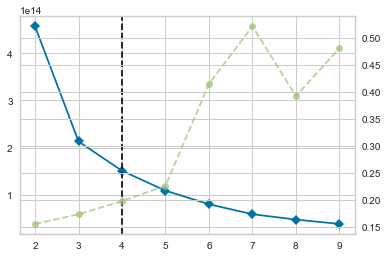

In [44]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(proveedores_precio)

In [55]:
model = KMeans(verbose=1, n_clusters=4)
model.fit(proveedores_precio)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 152887789876718.72
start iteration
done sorting
end inner loop
Iteration 1, inertia 151282432330058.16
start iteration
done sorting
end inner loop
Iteration 2, inertia 151282432330058.16
center shift 0.000000e+00 within tolerance 4.481811e+05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 151282432330058.16
start iteration
done sorting
end inner loop
Iteration 1, inertia 151282432330058.16
center shift 0.000000e+00 within tolerance 4.481811e+05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 151282432330058.16
start iteration
done sorting
end inner loop
Iteration 1, inertia 151282432330058.16
center shift 0.000000e+00 within tolerance 4.481811e+05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 162451577978466.9
start iteration
done sorting
end inner loop
Iteration 1, inertia 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [56]:
data_cluster = proveedores_clustered.copy()
data_cluster["categoria_precio"] = model.predict(proveedores_precio)


In [63]:
data_cluster[data_cluster["categoria_precio"] == 0]

,Unnamed: 0,Proveedor,Entidad Contratante,Código de resolución,Código de contratación,Objeto contractual,Unidad de medida,Cantidad,Descripción compra por ítem,Precio unitario,Precio total,categoria,categoria_precio
9,9,ROCHE ECUADOR S.A.,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00001,ADQUISICIÓN DE 100000 DETERMINACIONES PARA VIR...,Unidad,100000.00,ADQUISICIÓN DE 100000 DETERMINACIONES PARA VIR...,18.00,1800000.00,7,0
10,10,CAMPOSANTOS DEL ECUADOR S.A. CAMPOECUADOR,COORDINACIÓN ZONAL 8 - SALUD,MSP-CZ8S-2020-011,MSP-CZ8S-2020-011-00003,ADQUISICIÓN DE DOS MIL VEINTIDOS 2022 ESPACIOS...,Unidad,2022.00,ADQUISICION DE DOS MIL VEINTIDOS 2022 ESPACIOS...,849.99,1718680.59,8,0
11,11,APOLO APOLO JOSE GONZALO,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00030,ADQUISICIÓN DE PIPERACILINA + TAZOBACTAM SOLID...,Unidad,280800.00,PIPERACILINA + TAZOBACTAM SOLIDO PARENTERAL 40...,4.95,1389960.00,6,0
12,12,DIMPROKEL SA,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00048,ADQUISICIÓN DE PRUEBAS RÁPIDAS PARA DETECCIÓN ...,Unidad,100000.00,PRUEBAS RÁPIDAS PARA DETECCIÓN DE CORONAVIRUS ...,12.20,1220000.00,7,0
13,13,SIRICAN S.A.,MUNICIPALIDAD DE GUAYAQUIL,CE-MIMG-003-2020,CE-MIMG-003-2020-00007,ADQUISICIÓN DE RESPIRADORES DE TRANSPORTE Y UN...,Unidad,1.00,NaN,1149000.00,1149000.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19613,19613,RODRIGUEZ TORRES WILMER ITALO,GOBIERNO PROVINCIAL DE PICHINCHA,26-DGSG-20,26-DGSG-20-00014,CONTRATO MODIFICATORIO PARA CORREGIR EL ERROR ...,Unidad,0.01,NaN,0.01,0.00,7,0
19614,19614,CUMPLIMIENTO A LA CIRCULAR NRO. SERCOP-SERCOP-...,MUNICIPIO DE PEDERNALES,061-OEAN-GADMCP-2020,061-OEAN-GADMCP-2020-00001,CUMPLIMIENTO A LA CIRCULAR NRO. SERCOP-SERCOP-...,Unidad,0.01,SERVICIOS PRESTADOS POR OTRAS ENTIDADES EXTRAT...,0.00,0.00,6,0
19615,19615,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,GOBIERNO AUTONOMO DESCENTRALIZADO DEL CANTON R...,GADMR-ALC-2020-031-R,GADMR-ALC-2020-031-R-00001,INFORME DUPLICACION DE PUBLICACION DE SITUACIO...,Global,1.00,INFORME DUPLICACION DE PUBLICACION DE SITUACIO...,0.00,0.00,6,0
19616,19616,ACLARATORIA,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,GADMSD-RWEA-2020-153,GADMSD-RWEA-2020-153-00001,CUMPLIMIENTO A LA CIRCULAR NRO. SERCOP-SERCOP-...,Unidad,1.00,cumplimiento a la Circular Nro. SERCOP-SERCOP-...,0.00,0.00,6,0


In [58]:
data_cluster["categoria_precio"].unique()

array([2, 3, 1, 0])

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


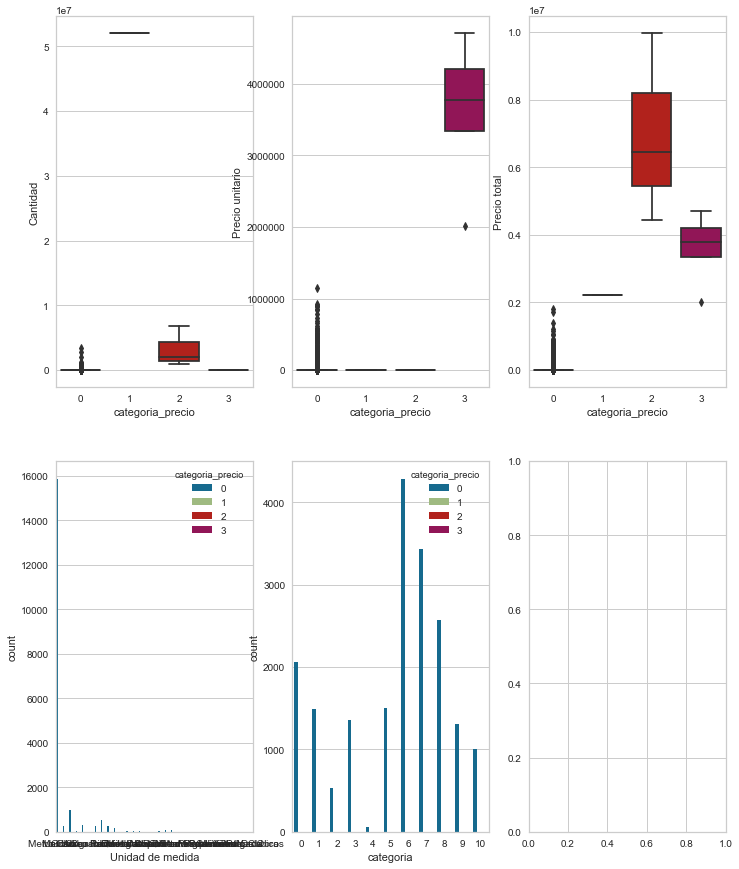

In [65]:


fig, axs = plt.subplots(2,3,figsize=(12,15))

sns.boxplot(x="categoria_precio", y="Cantidad", data=data_cluster, ax=axs[0][0])
sns.boxplot(x="categoria_precio", y="Precio unitario", data=data_cluster, ax=axs[0][1]) #Hacer relacion cantidad/precio
sns.boxplot(x="categoria_precio", y="Precio total", data=data_cluster, ax=axs[0][2])

sns.countplot(hue="categoria_precio", x="Unidad de medida", data=data_cluster, ax=axs[1][0])
sns.countplot(hue="categoria_precio", x="categoria", data=data_cluster, ax=axs[1][1])

fig.show()

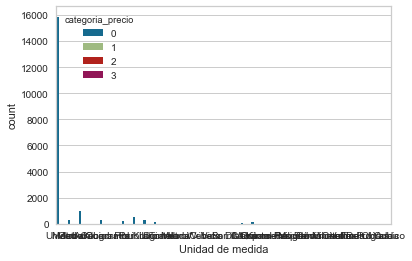

In [66]:
sns.countplot(hue="categoria_precio", x="Unidad de medida", data=data_cluster)

In [98]:
from sklearn.preprocessing import StandardScaler

In [69]:
min_max_scaler = MinMaxScaler()

scaled_array = min_max_scaler.fit_transform(proveedores_precio)

In [99]:
def scaleRows(df, rows):
    min_max_scaler = StandardScaler()
    
    for row in rows:
        df[row] = min_max_scaler.fit_transform(df[row].values.astype(float).reshape(-1, 1))

In [100]:
proveedores_precio_scaled = proveedores_precio.copy()

scaleRows(proveedores_precio_scaled, ["Cantidad", "Precio unitario", "Precio total"])

In [101]:
proveedores_precio_scaled

,Cantidad,Precio unitario,Precio total,categoria,unidad_Acre,unidad_Barril,unidad_Campamento Provisional De Obras,unidad_Centimetro,unidad_Centimetro Cubico,unidad_Día*,...,unidad_Quintal,unidad_Quintal Pequeño,unidad_Tesla,unidad_Tonelada,unidad_Unidad,unidad_Vatio,unidad_Voltio,unidad_Weber,unidad_Yarda,unidad_nan
0,5.277038,-0.054885,83.144632,6,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2.363958,-0.054852,53.687165,8,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-0.019469,70.630902,39.265630,7,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,18.094591,-0.054950,37.065633,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.019469,63.131776,35.090528,8,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19613,-0.019472,-0.054959,-0.088380,7,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19614,-0.019472,-0.054960,-0.088380,6,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19615,-0.019469,-0.054960,-0.088380,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19616,-0.019469,-0.054960,-0.088380,6,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [102]:
proveedores_precio

,Cantidad,Precio unitario,Precio total,categoria,unidad_Acre,unidad_Barril,unidad_Campamento Provisional De Obras,unidad_Centimetro,unidad_Centimetro Cubico,unidad_Día*,...,unidad_Quintal,unidad_Quintal Pequeño,unidad_Tesla,unidad_Tonelada,unidad_Unidad,unidad_Vatio,unidad_Voltio,unidad_Weber,unidad_Yarda,unidad_nan
0,2000000.00,4.98,9960000.0,6,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,900000.00,7.15,6435000.0,8,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1.00,4709260.50,4709260.5,7,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,6840000.00,0.65,4446000.0,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.00,4209650.90,4209650.9,8,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19613,0.01,0.01,0.0,7,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19614,0.01,0.00,0.0,6,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19615,1.00,0.00,0.0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19616,1.00,0.00,0.0,6,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [90]:
proveedores_precio.describe()

,Cantidad,Precio unitario,Precio total,categoria,unidad_Acre,unidad_Barril,unidad_Campamento Provisional De Obras,unidad_Centimetro,unidad_Centimetro Cubico,unidad_Día*,...,unidad_Quintal,unidad_Quintal Pequeño,unidad_Tesla,unidad_Tonelada,unidad_Unidad,unidad_Vatio,unidad_Voltio,unidad_Weber,unidad_Yarda,unidad_nan
count,1.961800e+04,1.961800e+04,1.961800e+04,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,...,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000
mean,7.352661e+03,3.661535e+03,1.057588e+04,5.433632,0.048986,0.000357,0.000153,0.000051,0.000102,0.000663,...,0.008615,0.000357,0.000051,0.000153,0.809308,0.000357,0.000408,0.000663,0.000102,0.035732
std,3.776168e+05,6.662408e+04,1.196671e+05,2.939051,0.215843,0.018887,0.012365,0.007140,0.010097,0.025734,...,0.092416,0.018887,0.007140,0.012365,0.392857,0.018887,0.020190,0.025734,0.010097,0.185627
min,1.000000e-02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000e+00,1.000000e+00,1.320000e+02,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.600000e+01,5.200000e+00,5.713750e+02,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000e+02,2.262750e+01,2.592912e+03,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.200000e+07,4.709260e+06,9.960000e+06,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
proveedores_precio_scaled.describe()

,Cantidad,Precio unitario,Precio total,categoria,unidad_Acre,unidad_Barril,unidad_Campamento Provisional De Obras,unidad_Centimetro,unidad_Centimetro Cubico,unidad_Día*,...,unidad_Quintal,unidad_Quintal Pequeño,unidad_Tesla,unidad_Tonelada,unidad_Unidad,unidad_Vatio,unidad_Voltio,unidad_Weber,unidad_Yarda,unidad_nan
count,1.961800e+04,1.961800e+04,1.961800e+04,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,...,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000
mean,-6.540044e-16,6.213822e-16,6.680735e-16,5.433632,0.048986,0.000357,0.000153,0.000051,0.000102,0.000663,...,0.008615,0.000357,0.000051,0.000153,0.809308,0.000357,0.000408,0.000663,0.000102,0.035732
std,1.000025e+00,1.000025e+00,1.000025e+00,2.939051,0.215843,0.018887,0.012365,0.007140,0.010097,0.025734,...,0.092416,0.018887,0.007140,0.012365,0.392857,0.018887,0.020190,0.025734,0.010097,0.185627
min,-1.947169e-02,-5.495953e-02,-8.837979e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.945053e-02,-5.494452e-02,-8.727670e-02,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.921749e-02,-5.488148e-02,-8.360496e-02,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-1.761794e-02,-5.461989e-02,-6.671152e-02,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.376898e+02,7.063090e+01,8.314463e+01,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c28b11350>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

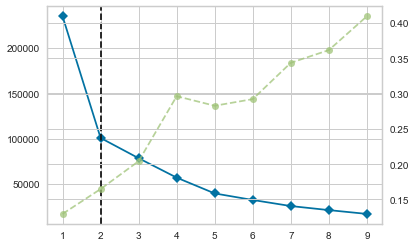

In [109]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(proveedores_precio_scaled)

In [111]:
model = KMeans(verbose=1, n_clusters=2)
model.fit(proveedores_precio_scaled)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 100771.46983518082
start iteration
done sorting
end inner loop
Iteration 1, inertia 100771.46983518082
center shift 0.000000e+00 within tolerance 3.327042e-05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 166442.9406617377
start iteration
done sorting
end inner loop
Iteration 1, inertia 140599.18719904355
start iteration
done sorting
end inner loop
Iteration 2, inertia 110242.04981996249
start iteration
done sorting
end inner loop
Iteration 3, inertia 100771.46983518082
start iteration
done sorting
end inner loop
Iteration 4, inertia 100771.46983518082
center shift 0.000000e+00 within tolerance 3.327042e-05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 101074.19061336905
start iteration
done sorting
end inner loop
Iteration 1, inertia 100771.46983518082
start iteration
done sorting
end inner loop
Iteration 2, iner

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [112]:
data_cluster_scaled = proveedores_clustered.copy()
data_cluster_scaled["categoria_precio"] = model.predict(proveedores_precio_scaled)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


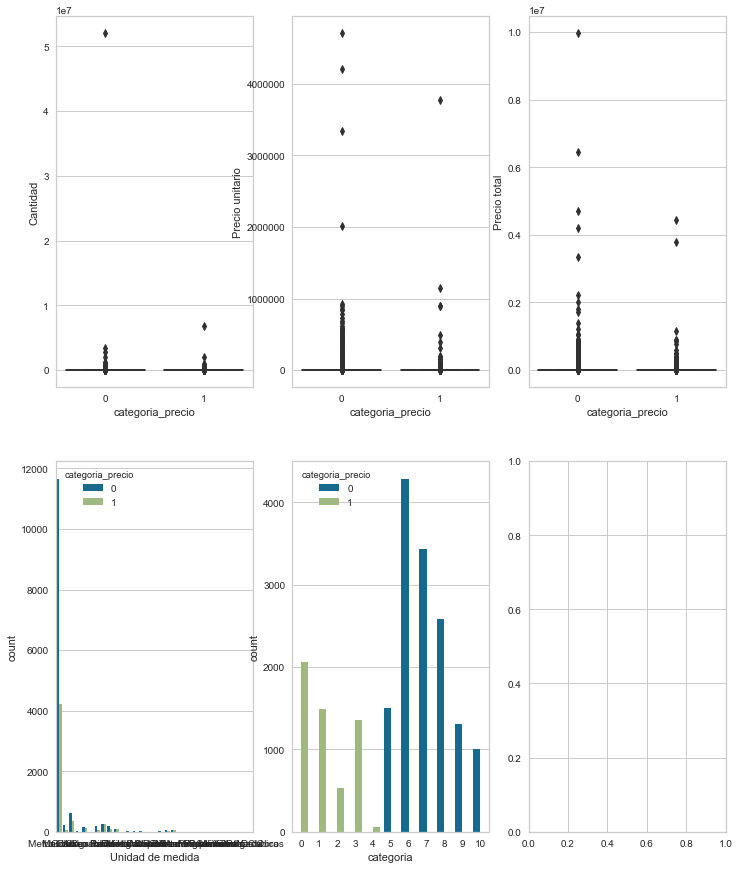

In [113]:


fig, axs = plt.subplots(2,3,figsize=(12,15))

sns.boxplot(x="categoria_precio", y="Cantidad", data=data_cluster_scaled, ax=axs[0][0])
sns.boxplot(x="categoria_precio", y="Precio unitario", data=data_cluster_scaled, ax=axs[0][1]) #Hacer relacion cantidad/precio
sns.boxplot(x="categoria_precio", y="Precio total", data=data_cluster_scaled, ax=axs[0][2])

sns.countplot(hue="categoria_precio", x="Unidad de medida", data=data_cluster_scaled, ax=axs[1][0])
sns.countplot(hue="categoria_precio", x="categoria", data=data_cluster_scaled, ax=axs[1][1])

fig.show()

In [117]:
data_cluster_scaled[data_cluster_scaled["categoria_precio"] == 1]

,Unnamed: 0,Proveedor,Entidad Contratante,Código de resolución,Código de contratación,Objeto contractual,Unidad de medida,Cantidad,Descripción compra por ítem,Precio unitario,Precio total,categoria,categoria_precio
3,3,CHICAIZA ALVARADO PEDRO GIOVANNY,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00006,ADQUISICIÓN DE MASCARILLAS QUIRURGICAS ELASTIC...,Unidad,6840000.0,MASCARILLA QUIRURGICA ELASTICO TAMAÑO ESTANDAR,0.65,4446000.00,2,1
5,5,SALUMED S.A.,GOBIERNO AUTONOMO DESCENTRALIZADO DEL DISTRITO...,MDMQ-SSU-001-2020,MDMQ-SSU-001-2020-00001,ADQUISICIÓN DE REACTIVOS PARA DETERMINACIÓN DE...,Unidad,1.0,DE ACUERDO A ESPECIFICACIONES TÉCNICAS,3774000.00,3774000.00,1,1
13,13,SIRICAN S.A.,MUNICIPALIDAD DE GUAYAQUIL,CE-MIMG-003-2020,CE-MIMG-003-2020-00007,ADQUISICIÓN DE RESPIRADORES DE TRANSPORTE Y UN...,Unidad,1.0,NaN,1149000.00,1149000.00,1,1
18,18,0992345233001,MUNICIPALIDAD DE GUAYAQUIL,CE-MIMG-003-2020,CE-MIMG-003-2020-00001,IMPLEMENTACIÓN DE TRABAJOS CIVILES-ELÉCTRICOS-...,Acre,1.0,NaN,890237.86,890237.86,1,1
19,19,ARKITRUST S.A.,MUNICIPALIDAD DE GUAYAQUIL,CE-MIMG-003-2020-C1,CE-MIMG-003-2020-C1-00001,IMPLEMENTACIÓN DE TRABAJOS CIVILES-ELÉCTRICOS-...,Unidad,1.0,NaN,890237.86,890237.86,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19582,19582,COMERCIAL FAREZ VILLACIS CIA. LTDA.,JUNTA PARROQUIAL DE SAYAUSI,11-2020-GPS,11-2020-GPS-00003,MATERIALES DE ASEO PARA DESINFECCIÓN DE VÍVERE...,Acre,1.0,UTILIZADA PARA PEGAR AFICHES INFORMATICOS.,0.63,0.63,1,1
19587,19587,ALDAS CAJAS CLEVER MANUEL,JUNTA PARROQUIAL RURAL DE POMONA,GADPRP-009-2020,GADPRP-009-2020-00004,ADQUISICIÓN DE MATERIALES E INSUMOS PARA ATEND...,Unidad,1.0,Polimex neplo 1P*100m,0.49,0.49,3,1
19591,19591,CALLE CALLE WILSON MARCELO,EMPRESA PUBLICA MUNICIPAL MANCOMUNADA DE ASEO ...,EMMAIPCG77,EMMAIPCG77-00012,ADQUISICIÓN DE EQUIPOS Y ACCESORIOS PARA LA CO...,Unidad,1.0,BUJE REDUCTOR 1X1/2,0.40,0.40,1,1
19592,19592,ALDAS CAJAS CLEVER MANUEL,JUNTA PARROQUIAL RURAL DE POMONA,GADPRP-009-2020,GADPRP-009-2020-00004,ADQUISICIÓN DE MATERIALES E INSUMOS PARA ATEND...,Unidad,1.0,NaN,0.40,0.40,3,1


In [118]:
model = KMeans(verbose=1, n_clusters=5)
model.fit(proveedores_precio_scaled)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 56843.696057503425
start iteration
done sorting
end inner loop
Iteration 1, inertia 54306.40800045092
start iteration
done sorting
end inner loop
Iteration 2, inertia 54306.40800045092
center shift 0.000000e+00 within tolerance 3.327042e-05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 44944.340904652076
start iteration
done sorting
end inner loop
Iteration 1, inertia 43626.327291267
start iteration
done sorting
end inner loop
Iteration 2, inertia 43626.327291267
center shift 0.000000e+00 within tolerance 3.327042e-05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 42707.46426228901
start iteration
done sorting
end inner loop
Iteration 1, inertia 39596.14531532652
start iteration
done sorting
end inner loop
Iteration 2, inertia 39590.11183105657
start iteration
done sorting
end inner loop
Iteration 3, inertia 39590.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [119]:
data_cluster_scaled = proveedores_clustered.copy()
data_cluster_scaled["categoria_precio"] = model.predict(proveedores_precio_scaled)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


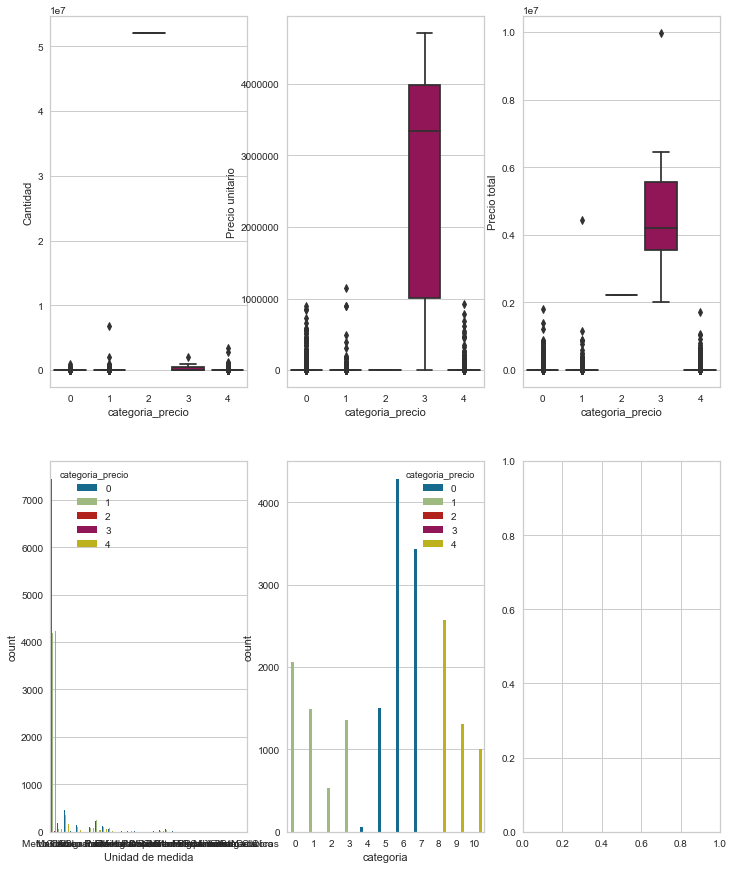

In [120]:


fig, axs = plt.subplots(2,3,figsize=(12,15))

sns.boxplot(x="categoria_precio", y="Cantidad", data=data_cluster_scaled, ax=axs[0][0])
sns.boxplot(x="categoria_precio", y="Precio unitario", data=data_cluster_scaled, ax=axs[0][1]) #Hacer relacion cantidad/precio
sns.boxplot(x="categoria_precio", y="Precio total", data=data_cluster_scaled, ax=axs[0][2])

sns.countplot(hue="categoria_precio", x="Unidad de medida", data=data_cluster_scaled, ax=axs[1][0])
sns.countplot(hue="categoria_precio", x="categoria", data=data_cluster_scaled, ax=axs[1][1])

fig.show()

In [121]:
from sklearn.decomposition import PCA

In [145]:
pca = PCA(n_components=0.9, svd_solver ='full')
pca.fit(proveedores_precio_scaled)
data_pca = pca.transform(proveedores_precio_scaled)

In [146]:
data_pca.shape

(19618, 3)

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c279e57d0>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

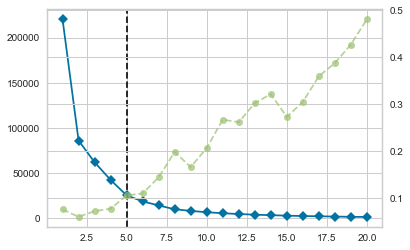

In [147]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,21))
visualizer.fit(data_pca)

In [148]:
model = KMeans(verbose=1, n_clusters=5)
model.fit(data_pca)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 29273.46972923593
start iteration
done sorting
end inner loop
Iteration 1, inertia 25428.79224120228
start iteration
done sorting
end inner loop
Iteration 2, inertia 25428.79224120228
center shift 0.000000e+00 within tolerance 3.743469e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 31266.265610310485
start iteration
done sorting
end inner loop
Iteration 1, inertia 30022.309217395137
start iteration
done sorting
end inner loop
Iteration 2, inertia 30022.309217395137
center shift 0.000000e+00 within tolerance 3.743469e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 39404.72158199157
start iteration
done sorting
end inner loop
Iteration 1, inertia 35243.97224010797
start iteration
done sorting
end inner loop
Iteration 2, inertia 30022.309217395137
start iteration
done sorting
end inner loop
Iteration 3, inertia 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [128]:
data_cluster_scaled_pca = proveedores_clustered.copy()
data_cluster_scaled_pca["categoria_precio"] = model.predict(data_pca)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


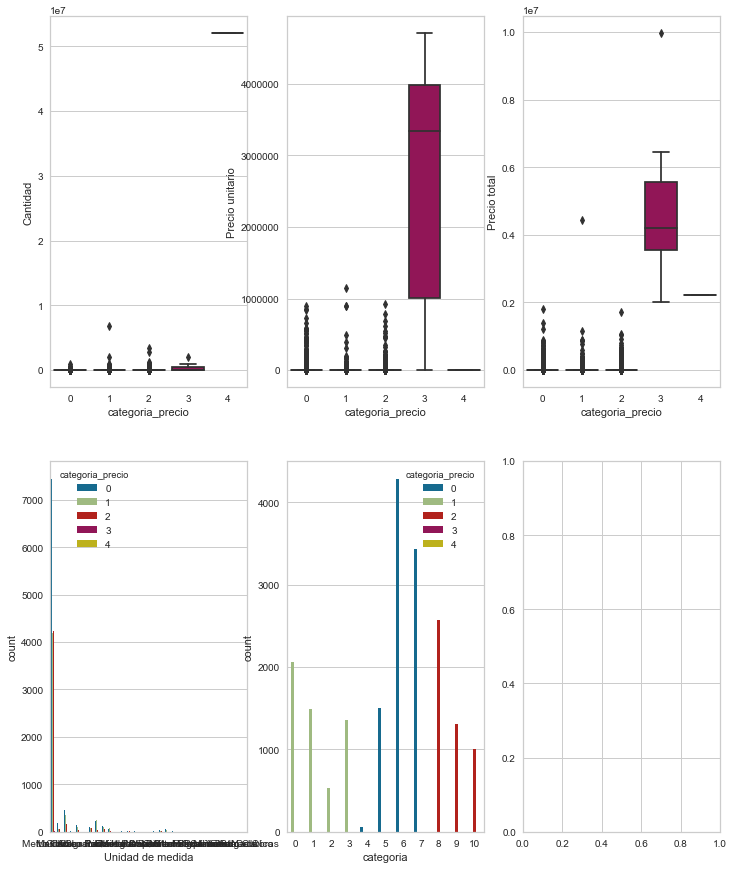

In [129]:
fig, axs = plt.subplots(2,3,figsize=(12,15))

sns.boxplot(x="categoria_precio", y="Cantidad", data=data_cluster_scaled_pca, ax=axs[0][0])
sns.boxplot(x="categoria_precio", y="Precio unitario", data=data_cluster_scaled_pca, ax=axs[0][1]) #Hacer relacion cantidad/precio
sns.boxplot(x="categoria_precio", y="Precio total", data=data_cluster_scaled_pca, ax=axs[0][2])

sns.countplot(hue="categoria_precio", x="Unidad de medida", data=data_cluster_scaled_pca, ax=axs[1][0])
sns.countplot(hue="categoria_precio", x="categoria", data=data_cluster_scaled_pca, ax=axs[1][1])

fig.show()

In [138]:
data_cluster_scaled_pca[data_cluster_scaled_pca["categoria_precio"] == 1]

,Unnamed: 0,Proveedor,Entidad Contratante,Código de resolución,Código de contratación,Objeto contractual,Unidad de medida,Cantidad,Descripción compra por ítem,Precio unitario,Precio total,categoria,categoria_precio
3,3,CHICAIZA ALVARADO PEDRO GIOVANNY,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00006,ADQUISICIÓN DE MASCARILLAS QUIRURGICAS ELASTIC...,Unidad,6840000.0,MASCARILLA QUIRURGICA ELASTICO TAMAÑO ESTANDAR,0.65,4446000.00,2,1
13,13,SIRICAN S.A.,MUNICIPALIDAD DE GUAYAQUIL,CE-MIMG-003-2020,CE-MIMG-003-2020-00007,ADQUISICIÓN DE RESPIRADORES DE TRANSPORTE Y UN...,Unidad,1.0,NaN,1149000.00,1149000.00,1,1
18,18,0992345233001,MUNICIPALIDAD DE GUAYAQUIL,CE-MIMG-003-2020,CE-MIMG-003-2020-00001,IMPLEMENTACIÓN DE TRABAJOS CIVILES-ELÉCTRICOS-...,Acre,1.0,NaN,890237.86,890237.86,1,1
19,19,ARKITRUST S.A.,MUNICIPALIDAD DE GUAYAQUIL,CE-MIMG-003-2020-C1,CE-MIMG-003-2020-C1-00001,IMPLEMENTACIÓN DE TRABAJOS CIVILES-ELÉCTRICOS-...,Unidad,1.0,NaN,890237.86,890237.86,1,1
20,20,GUACHO AMAYA ANA ALEXANDRA,GOBIERNO PROVINCIAL DEL GUAYAS,GPG-PG-014-2020-,GPG-PG-014-202000008,SEGUNDA ADQUISICIÓN DE AMONIO CUATERNARIO PARA...,Unidad,63175.0,AMONIO CUATERNARIO,13.60,859180.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19582,19582,COMERCIAL FAREZ VILLACIS CIA. LTDA.,JUNTA PARROQUIAL DE SAYAUSI,11-2020-GPS,11-2020-GPS-00003,MATERIALES DE ASEO PARA DESINFECCIÓN DE VÍVERE...,Acre,1.0,UTILIZADA PARA PEGAR AFICHES INFORMATICOS.,0.63,0.63,1,1
19587,19587,ALDAS CAJAS CLEVER MANUEL,JUNTA PARROQUIAL RURAL DE POMONA,GADPRP-009-2020,GADPRP-009-2020-00004,ADQUISICIÓN DE MATERIALES E INSUMOS PARA ATEND...,Unidad,1.0,Polimex neplo 1P*100m,0.49,0.49,3,1
19591,19591,CALLE CALLE WILSON MARCELO,EMPRESA PUBLICA MUNICIPAL MANCOMUNADA DE ASEO ...,EMMAIPCG77,EMMAIPCG77-00012,ADQUISICIÓN DE EQUIPOS Y ACCESORIOS PARA LA CO...,Unidad,1.0,BUJE REDUCTOR 1X1/2,0.40,0.40,1,1
19592,19592,ALDAS CAJAS CLEVER MANUEL,JUNTA PARROQUIAL RURAL DE POMONA,GADPRP-009-2020,GADPRP-009-2020-00004,ADQUISICIÓN DE MATERIALES E INSUMOS PARA ATEND...,Unidad,1.0,NaN,0.40,0.40,3,1


In [141]:
data_cluster_scaled_pca["categoria_precio"].value_counts()

0    9275
1    5444
2    4891
3       7
4       1
Name: categoria_precio, dtype: int64

In [142]:
proveedores_precio_scaled

,Cantidad,Precio unitario,Precio total,categoria,unidad_Acre,unidad_Barril,unidad_Campamento Provisional De Obras,unidad_Centimetro,unidad_Centimetro Cubico,unidad_Día*,...,unidad_Quintal,unidad_Quintal Pequeño,unidad_Tesla,unidad_Tonelada,unidad_Unidad,unidad_Vatio,unidad_Voltio,unidad_Weber,unidad_Yarda,unidad_nan
0,5.277038,-0.054885,83.144632,6,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2.363958,-0.054852,53.687165,8,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-0.019469,70.630902,39.265630,7,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,18.094591,-0.054950,37.065633,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.019469,63.131776,35.090528,8,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19613,-0.019472,-0.054959,-0.088380,7,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19614,-0.019472,-0.054960,-0.088380,6,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19615,-0.019469,-0.054960,-0.088380,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19616,-0.019469,-0.054960,-0.088380,6,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [184]:
pca = PCA(n_components=2, svd_solver ='full')
pca.fit(proveedores_precio_scaled)
data_pca = pca.transform(proveedores_precio_scaled)

In [185]:
data_pca.shape

(19618, 2)

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c2a7391d0>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

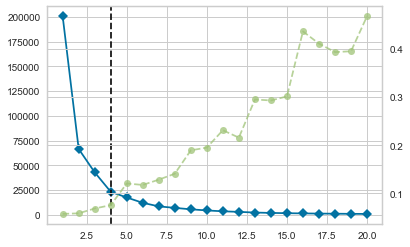

In [186]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,21))
visualizer.fit(data_pca)

In [190]:
model = KMeans(verbose=1, n_clusters=3)
model.fit(data_pca)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 53827.455566598925
start iteration
done sorting
end inner loop
Iteration 1, inertia 46894.824913429686
start iteration
done sorting
end inner loop
Iteration 2, inertia 46818.58249146026
start iteration
done sorting
end inner loop
Iteration 3, inertia 46817.5628963293
center shift 1.086139e-02 within tolerance 5.114864e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 47266.9308417763
start iteration
done sorting
end inner loop
Iteration 1, inertia 46819.54365804017
start iteration
done sorting
end inner loop
Iteration 2, inertia 46817.73898296328
center shift 1.216925e-02 within tolerance 5.114864e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 42914.1561589569
start iteration
done sorting
end inner loop
Iteration 1, inertia 42869.488427478704
center shift 1.875025e-02 within tolerance 5.114864e-04
Initializatio

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [191]:
data_cluster_scaled_pca = proveedores_clustered.copy()
data_cluster_scaled_pca["categoria_precio"] = model.predict(data_pca)

In [192]:
data_cluster_scaled_pca["categoria_precio"].value_counts()

0    14111
1     5498
2        9
Name: categoria_precio, dtype: int64

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


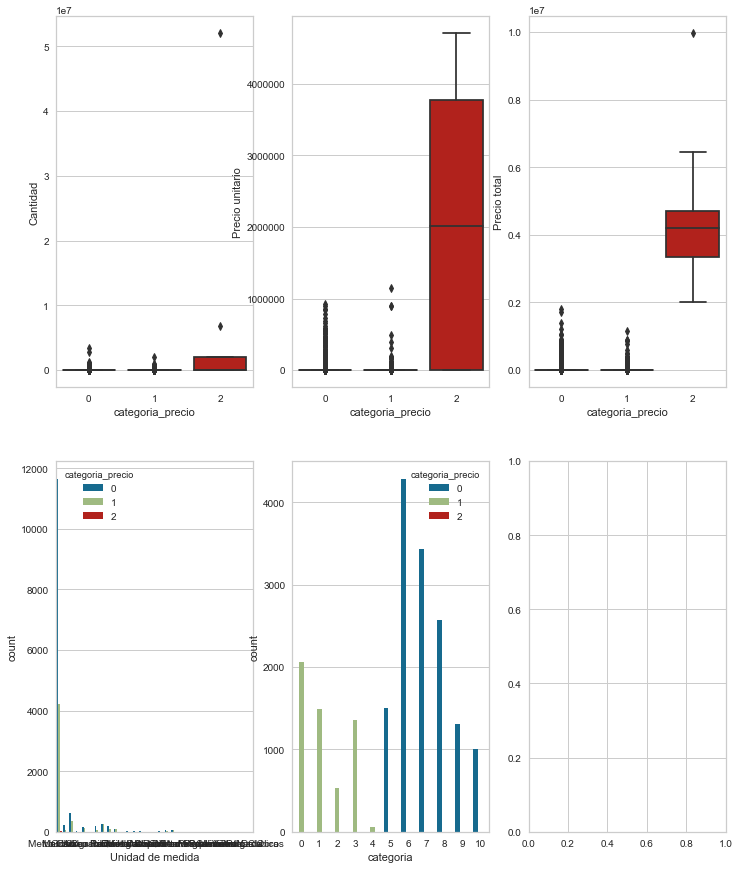

In [193]:
fig, axs = plt.subplots(2,3,figsize=(12,15))

sns.boxplot(x="categoria_precio", y="Cantidad", data=data_cluster_scaled_pca, ax=axs[0][0])
sns.boxplot(x="categoria_precio", y="Precio unitario", data=data_cluster_scaled_pca, ax=axs[0][1]) #Hacer relacion cantidad/precio
sns.boxplot(x="categoria_precio", y="Precio total", data=data_cluster_scaled_pca, ax=axs[0][2])

sns.countplot(hue="categoria_precio", x="Unidad de medida", data=data_cluster_scaled_pca, ax=axs[1][0])
sns.countplot(hue="categoria_precio", x="categoria", data=data_cluster_scaled_pca, ax=axs[1][1])

fig.show()

In [195]:
data_cluster_scaled_pca[data_cluster_scaled_pca["categoria_precio"] == 2]

,Unnamed: 0,Proveedor,Entidad Contratante,Código de resolución,Código de contratación,Objeto contractual,Unidad de medida,Cantidad,Descripción compra por ítem,Precio unitario,Precio total,categoria,categoria_precio
0,0,MARTINEZ VELASQUEZ ISIDORO RICARDO,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00047,ADQUISICIÓN DE RESPIRADOR CON EFICIENCIA DE FI...,Unidad,2000000.0,RESPIRADOR CON EFICIENCIA DE FILTRACIÓN MÍNIMA...,4.98,9960000.00,6,2
1,1,SUMINISTROS MEDICOS MANOSALVAS VILLAGOMEZ MV A...,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00045,ADQUISICIÓN DE 900000 PRUEBAS RÁPIDAS PARA LA ...,Unidad,900000.0,PRUEBAS RÁPIDAS PARA LA DETERMINACIÓN DE ANTIC...,7.15,6435000.00,8,2
2,2,MILENIO LIMPIEZA Y MANTENIMIENTO S.A. MILIMAN,"GUAYAQUIL SIGLO XXI, FUNDACIÓN MUNICIPAL PARA ...",GSXXI-01-2020,GSXXI-01-2020-00001,PRESTACIÓN DE TRAPEADO Y SERVICIOS COMPLEMENTA...,Unidad,1.0,Limpieza en areas regeneradas,4709260.50,4709260.50,7,2
3,3,CHICAIZA ALVARADO PEDRO GIOVANNY,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00006,ADQUISICIÓN DE MASCARILLAS QUIRURGICAS ELASTIC...,Unidad,6840000.0,MASCARILLA QUIRURGICA ELASTICO TAMAÑO ESTANDAR,0.65,4446000.00,2,2
4,4,CONSORCIO CASUARINA,MUNICIPALIDAD DE GUAYAQUIL,CE-MIMG-003-2020,CE-MIMG-003-2020-00032,"EJECUCIÓN DE LOS TRABAJOS CIVILES, ESTRUCTURAL...",Unidad,1.0,NaN,4209650.90,4209650.90,8,2
5,5,SALUMED S.A.,GOBIERNO AUTONOMO DESCENTRALIZADO DEL DISTRITO...,MDMQ-SSU-001-2020,MDMQ-SSU-001-2020-00001,ADQUISICIÓN DE REACTIVOS PARA DETERMINACIÓN DE...,Unidad,1.0,DE ACUERDO A ESPECIFICACIONES TÉCNICAS,3774000.00,3774000.00,1,2
6,6,CONSORCIO CEMENTERIO SUBURBIO,MUNICIPALIDAD DE GUAYAQUIL,CE-MIMG-003-2020,CE-MIMG-003-2020-00019,REPOTENCIACIÓN CEMENTERIO ANGEL MARÍA CANALS,Unidad,1.0,NaN,3348252.56,3348252.56,6,2
7,7,COMERCIALIZADORA NUTRI MED NUTRIMEDECUADOR S.A.,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00009,ADQUISICIÓN DE 52000000 DE UNIDADES DEL MEDICA...,Unidad,52000000.0,PARACETAMOL SOLIDO ORAL 500 MG CAJA X BLISTER ...,0.04,2210000.00,8,2
8,8,ARKITRUST S.A.,MUNICIPALIDAD DE GUAYAQUIL,CE-MIMG-003-2020,CE-MIMG-003-2020-00018,"FASE II DE LAS OBRAS PARA REHABILITACIÓN, REPO...",Unidad,1.0,NaN,2008090.29,2008090.29,7,2


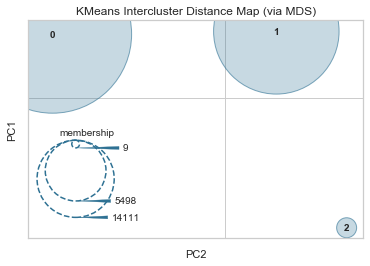

In [196]:
from yellowbrick.cluster import InterclusterDistance

model = KMeans(3)
visualizer = InterclusterDistance(model)

visualizer.fit(data_pca)        # Fit the data to the visualizer
visualizer.show()

In [197]:
data_pca

array([[-0.9872688 , 60.04048174],
       [-2.83580929, 38.48909103],
       [-2.0679428 , 74.69027982],
       ...,
       [-0.55652601, -0.11208816],
       [-0.56826287, -0.1062336 ],
       [-0.56826287, -0.1062336 ]])

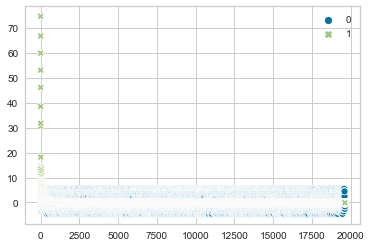

In [198]:
sns.scatterplot(data=data_pca)

In [199]:
from sklearn.cluster import DBSCAN

In [225]:
db_scan = DBSCAN(eps=1, min_samples=10)
db_scan.fit(proveedores_precio)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [226]:
data_cluster_dbscan = proveedores_clustered.copy()
data_cluster_dbscan["categoria_precio"] = db_scan.fit_predict(proveedores_precio)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


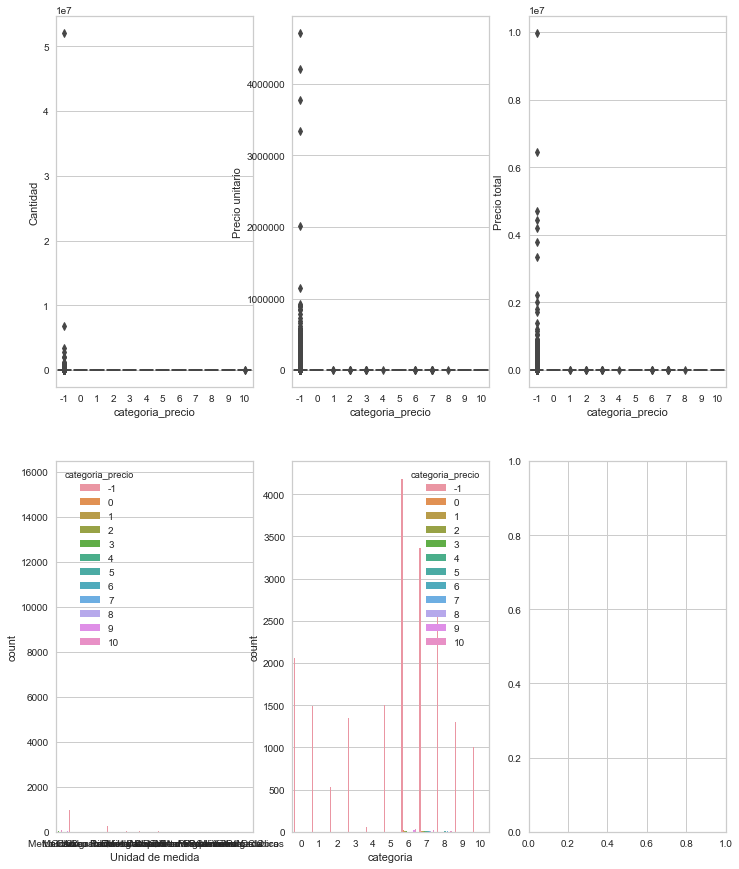

In [227]:
fig, axs = plt.subplots(2,3,figsize=(12,15))

sns.boxplot(x="categoria_precio", y="Cantidad", data=data_cluster_dbscan, ax=axs[0][0])
sns.boxplot(x="categoria_precio", y="Precio unitario", data=data_cluster_dbscan, ax=axs[0][1]) #Hacer relacion cantidad/precio
sns.boxplot(x="categoria_precio", y="Precio total", data=data_cluster_dbscan, ax=axs[0][2])

sns.countplot(hue="categoria_precio", x="Unidad de medida", data=data_cluster_dbscan, ax=axs[1][0])
sns.countplot(hue="categoria_precio", x="categoria", data=data_cluster_dbscan, ax=axs[1][1])

fig.show()

In [228]:
data_cluster_dbscan["categoria_precio"].value_counts()

-1     19423
 10       62
 0        24
 9        16
 7        15
 3        15
 2        12
 5        11
 8        10
 6        10
 4        10
 1        10
Name: categoria_precio, dtype: int64

In [229]:
pca = PCA(n_components=0.9, svd_solver ='full')
pca.fit(proveedores_precio_scaled)
data_pca = pca.transform(proveedores_precio_scaled)

In [230]:
data_pca.shape

(19618, 3)

In [239]:
db_scan = DBSCAN(eps=0.9, min_samples=10)
data_cluster_dbscan = proveedores_clustered.copy()
data_cluster_dbscan["categoria_precio"] = db_scan.fit_predict(data_pca)

In [240]:
data_cluster_dbscan["categoria_precio"].value_counts()

 1     4273
 2     3412
 0     2553
 3     2062
 7     1492
 5     1487
 6     1349
 4     1302
 9     1009
 8      529
-1       95
 10      55
Name: categoria_precio, dtype: int64

In [233]:
data_cluster_dbscan[data_cluster_dbscan["categoria_precio"] == -1]

,Unnamed: 0,Proveedor,Entidad Contratante,Código de resolución,Código de contratación,Objeto contractual,Unidad de medida,Cantidad,Descripción compra por ítem,Precio unitario,Precio total,categoria,categoria_precio
0,0,MARTINEZ VELASQUEZ ISIDORO RICARDO,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00047,ADQUISICIÓN DE RESPIRADOR CON EFICIENCIA DE FI...,Unidad,2000000.0,RESPIRADOR CON EFICIENCIA DE FILTRACIÓN MÍNIMA...,4.98,9960000.0,6,-1
1,1,SUMINISTROS MEDICOS MANOSALVAS VILLAGOMEZ MV A...,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00045,ADQUISICIÓN DE 900000 PRUEBAS RÁPIDAS PARA LA ...,Unidad,900000.0,PRUEBAS RÁPIDAS PARA LA DETERMINACIÓN DE ANTIC...,7.15,6435000.0,8,-1
2,2,MILENIO LIMPIEZA Y MANTENIMIENTO S.A. MILIMAN,"GUAYAQUIL SIGLO XXI, FUNDACIÓN MUNICIPAL PARA ...",GSXXI-01-2020,GSXXI-01-2020-00001,PRESTACIÓN DE TRAPEADO Y SERVICIOS COMPLEMENTA...,Unidad,1.0,Limpieza en areas regeneradas,4709260.50,4709260.5,7,-1
3,3,CHICAIZA ALVARADO PEDRO GIOVANNY,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00006,ADQUISICIÓN DE MASCARILLAS QUIRURGICAS ELASTIC...,Unidad,6840000.0,MASCARILLA QUIRURGICA ELASTICO TAMAÑO ESTANDAR,0.65,4446000.0,2,-1
4,4,CONSORCIO CASUARINA,MUNICIPALIDAD DE GUAYAQUIL,CE-MIMG-003-2020,CE-MIMG-003-2020-00032,"EJECUCIÓN DE LOS TRABAJOS CIVILES, ESTRUCTURAL...",Unidad,1.0,NaN,4209650.90,4209650.9,8,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,ALMACENES BANDA JUNIOR C LTDA,MUNICIPALIDAD DE GUAYAQUIL,CE-MIMG-003-2020,CE-MIMG-003-2020-00012,ADQUISICIÓN DE INSUMOS MÉDICOS: BATAS PERSONAL...,Unidad,1.0,NaN,169000.00,169000.0,3,-1
203,203,VOSCORP S.A.,GOBIERNO AUTONOMO DESCENTRALIZADO PROVINCIAL ...,2020-005-RA-GADPEO-C,2020-005-RA-GADPEO-C-00004,"ADQUISICIÓN DE BATAS DE PROTECCIÓN DESECHABLE,...",Unidad,1.0,INSUMOS MÉDICOS,162400.00,162400.0,2,-1
234,234,ROJAS GALARRAGA PABLO ALBERTO,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,GADMCLCRALDAA2020328,GADMCLCRALDAA2020328-00002,ADQUISICION DE INSUMOS PARA AFRONTAR LA EMERGE...,Par,1000000.0,GUANTES LATEX TALLA ML X100,0.14,140000.0,3,-1
474,474,IMPORTADORA Y DISTRIBUIDORA MEDICA FERBOVASA C...,HOSPITAL DE ESPECIALIDADES - TEODORO MALDONADO...,HTMC-GG-2020-0001-R,HTMC-GG-2020-0001-R-00013,ADQUISICION DE MEDICAMENTOS NO CATALOGADOS PAR...,Unidad,1080000.0,NaN,0.06,64800.0,8,-1


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


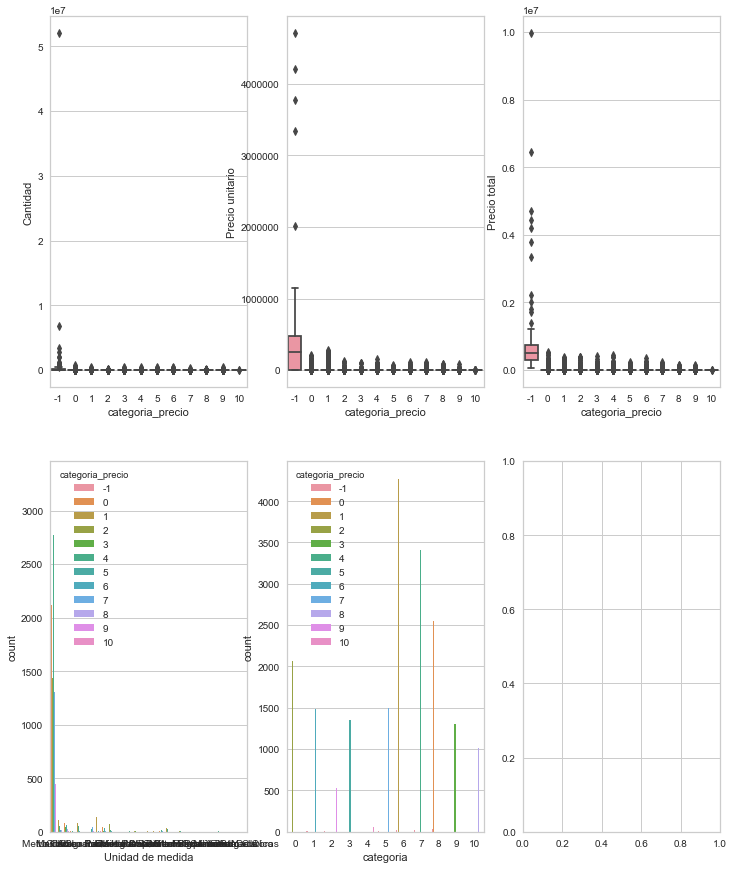

In [238]:
fig, axs = plt.subplots(2,3,figsize=(12,15))

sns.boxplot(x="categoria_precio", y="Cantidad", data=data_cluster_dbscan, ax=axs[0][0])
sns.boxplot(x="categoria_precio", y="Precio unitario", data=data_cluster_dbscan, ax=axs[0][1]) #Hacer relacion cantidad/precio
sns.boxplot(x="categoria_precio", y="Precio total", data=data_cluster_dbscan, ax=axs[0][2])

sns.countplot(hue="categoria_precio", x="Unidad de medida", data=data_cluster_dbscan, ax=axs[1][0])
sns.countplot(hue="categoria_precio", x="categoria", data=data_cluster_dbscan, ax=axs[1][1])

fig.show()

In [235]:
data_cluster_dbscan[data_cluster_dbscan["categoria_precio"] == -1].describe()

,Unnamed: 0,Cantidad,Precio unitario,Precio total,categoria,categoria_precio
count,91.000000,9.100000e+01,9.100000e+01,9.100000e+01,91.000000,91.0
mean,72.351648,8.780382e+05,4.870141e+05,9.524271e+05,5.967033,-1.0
std,86.170293,5.494987e+06,8.387832e+05,1.438562e+06,2.415002,0.0
min,0.000000,1.000000e+00,4.000000e-02,5.328000e+04,0.000000,-1.0
25%,22.500000,1.000000e+00,7.370000e+00,3.511305e+05,5.000000,-1.0
50%,50.000000,1.000000e+00,3.423572e+05,5.340000e+05,7.000000,-1.0
75%,93.500000,1.000000e+05,5.459133e+05,8.198243e+05,8.000000,-1.0
max,574.000000,5.200000e+07,4.709260e+06,9.960000e+06,9.000000,-1.0


In [325]:
proveedores_clustered["relac_precio_unit_cant"] = proveedores_clustered["Precio unitario"] / proveedores_clustered["Cantidad"]

In [247]:
proveedores_clustered[proveedores_clustered["Precio unitario"] == 0]

,Unnamed: 0,Proveedor,Entidad Contratante,Código de resolución,Código de contratación,Objeto contractual,Unidad de medida,Cantidad,Descripción compra por ítem,Precio unitario,Precio total,categoria
14771,14771,CHICAIZA TIGSE GLADYS MARITZA,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL R...,GADPRSJP-006-2020,GADPRSJP-006-2020-00004,CLORO GRANULADO -AMONIO CUATERNARIO,Gramo,28600.00,Cloro granulado,0.0,128.7,6
17986,17986,GUEVARA ROBALINO ROSA DEL CARMEN,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,016-GADMCG-2020,016-GADMCG-2020-00003,"ADQUISICIÓN INSUMOS, EQUIPOS DE PROTECCIÓN, MA...",Unidad,30000.00,VER PROYECTO,0.0,27.0,10
19611,19611,HOSPITAL DEL NIÑO DR. FRANCISCO DE ICAZA BUSTA...,HOSPITAL DEL NIÑO FY,AJ-064-2020,AJ-064-2020-00001,NO APLICA,Unidad,1.00,STANDAR,0.0,0.0,6
19612,19612,COBO SALINAS MARCO ANTONIO,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,026-2020-PSM-AL,026-2020-PSM-AL-00001,"NINGUNA, INFORME DE CREACIÓN DE ERROR DE EMERG...",Unidad,1.00,INGRESO DE DATOS PARA FINALIZACION DEL PROCESO,0.0,0.0,6
19614,19614,CUMPLIMIENTO A LA CIRCULAR NRO. SERCOP-SERCOP-...,MUNICIPIO DE PEDERNALES,061-OEAN-GADMCP-2020,061-OEAN-GADMCP-2020-00001,CUMPLIMIENTO A LA CIRCULAR NRO. SERCOP-SERCOP-...,Unidad,0.01,SERVICIOS PRESTADOS POR OTRAS ENTIDADES EXTRAT...,0.0,0.0,6
19615,19615,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,GOBIERNO AUTONOMO DESCENTRALIZADO DEL CANTON R...,GADMR-ALC-2020-031-R,GADMR-ALC-2020-031-R-00001,INFORME DUPLICACION DE PUBLICACION DE SITUACIO...,Global,1.00,INFORME DUPLICACION DE PUBLICACION DE SITUACIO...,0.0,0.0,6
19616,19616,ACLARATORIA,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,GADMSD-RWEA-2020-153,GADMSD-RWEA-2020-153-00001,CUMPLIMIENTO A LA CIRCULAR NRO. SERCOP-SERCOP-...,Unidad,1.00,cumplimiento a la Circular Nro. SERCOP-SERCOP-...,0.0,0.0,6
19617,19617,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIA RU...,JUNTA PARROQUIAL DE YARUQUI,informe005,informe005-00001,"NO SE HAN REALIZADO CONTRATACIONES, ADJUNTO DO...",Unidad,1.00,no se ha hecho contrataciones,0.0,0.0,6


In [251]:
proveedores_precio.describe()

,Cantidad,Precio unitario,Precio total,categoria,unidad_Acre,unidad_Barril,unidad_Campamento Provisional De Obras,unidad_Centimetro,unidad_Centimetro Cubico,unidad_Día*,...,unidad_Tesla,unidad_Tonelada,unidad_Unidad,unidad_Vatio,unidad_Voltio,unidad_Weber,unidad_Yarda,unidad_nan,relac_cant_precio_unit,relac_precio_unit_cant
count,1.961800e+04,1.961800e+04,1.961800e+04,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,...,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,1.961800e+04,1.961800e+04
mean,7.352661e+03,3.661535e+03,1.057588e+04,5.433632,0.048986,0.000357,0.000153,0.000051,0.000102,0.000663,...,0.000051,0.000153,0.809308,0.000357,0.000408,0.000663,0.000102,0.035732,inf,3.599985e+03
std,3.776168e+05,6.662408e+04,1.196671e+05,2.939051,0.215843,0.018887,0.012365,0.007140,0.010097,0.025734,...,0.007140,0.012365,0.392857,0.018887,0.020190,0.025734,0.010097,0.185627,NaN,6.661033e+04
min,1.000000e-02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.123476e-07,0.000000e+00
25%,8.000000e+00,1.000000e+00,1.320000e+02,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.693424e-01,1.966667e-03
50%,9.600000e+01,5.200000e+00,5.713750e+02,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.573116e+01,6.356818e-02
75%,7.000000e+02,2.262750e+01,2.592912e+03,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.084746e+02,2.130641e+00
max,5.200000e+07,4.709260e+06,9.960000e+06,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,inf,4.709260e+06


In [254]:
proveedores_precio = proveedores_precio.drop(['relac_cant_precio_unit'], axis=1)

In [255]:
proveedores_precio_ratio_scaled = proveedores_precio.copy()

scaleRows(proveedores_precio_ratio_scaled, ["Cantidad", "Precio unitario", "Precio total", "relac_precio_unit_cant"])

In [256]:
proveedores_precio_ratio_scaled.describe()

,Cantidad,Precio unitario,Precio total,categoria,unidad_Acre,unidad_Barril,unidad_Campamento Provisional De Obras,unidad_Centimetro,unidad_Centimetro Cubico,unidad_Día*,...,unidad_Quintal Pequeño,unidad_Tesla,unidad_Tonelada,unidad_Unidad,unidad_Vatio,unidad_Voltio,unidad_Weber,unidad_Yarda,unidad_nan,relac_precio_unit_cant
count,1.961800e+04,1.961800e+04,1.961800e+04,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,...,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,1.961800e+04
mean,-6.540044e-16,6.213822e-16,6.680735e-16,5.433632,0.048986,0.000357,0.000153,0.000051,0.000102,0.000663,...,0.000357,0.000051,0.000153,0.809308,0.000357,0.000408,0.000663,0.000102,0.035732,1.151167e-16
std,1.000025e+00,1.000025e+00,1.000025e+00,2.939051,0.215843,0.018887,0.012365,0.007140,0.010097,0.025734,...,0.018887,0.007140,0.012365,0.392857,0.018887,0.020190,0.025734,0.010097,0.185627,1.000025e+00
min,-1.947169e-02,-5.495953e-02,-8.837979e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.404682e-02
25%,-1.945053e-02,-5.494452e-02,-8.727670e-02,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.404679e-02
50%,-1.921749e-02,-5.488148e-02,-8.360496e-02,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.404587e-02
75%,-1.761794e-02,-5.461989e-02,-6.671152e-02,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.401483e-02
max,1.376898e+02,7.063090e+01,8.314463e+01,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.064641e+01


In [267]:
pca = PCA(n_components=0.95, svd_solver ='full')
pca.fit(proveedores_precio_ratio_scaled)
data_pca = pca.transform(proveedores_precio_ratio_scaled)

In [268]:
data_pca.shape

(19618, 4)

In [277]:
db_scan = DBSCAN(eps=0.99, min_samples=10)
data_cluster_dbscan = proveedores_clustered.copy()
data_cluster_dbscan["categoria_precio"] = db_scan.fit_predict(data_pca)

In [278]:
data_cluster_dbscan["categoria_precio"].value_counts()

 0    19497
-1      121
Name: categoria_precio, dtype: int64

In [280]:
from sklearn.preprocessing import RobustScaler

In [306]:
def scaleRows(df, rows):
    min_max_scaler = StandardScaler()
    
    for row in rows:
        df[row] = min_max_scaler.fit_transform(df[row].values.astype(float).reshape(-1, 1))

In [307]:
proveedores_precio_ratio_scaled = proveedores_precio.copy()

scaleRows(proveedores_precio_ratio_scaled, ["Cantidad", "Precio unitario", "Precio total", "relac_precio_unit_cant"])

In [282]:
proveedores_precio_ratio_scaled.describe()

,Cantidad,Precio unitario,Precio total,categoria,unidad_Acre,unidad_Barril,unidad_Campamento Provisional De Obras,unidad_Centimetro,unidad_Centimetro Cubico,unidad_Día*,...,unidad_Quintal Pequeño,unidad_Tesla,unidad_Tonelada,unidad_Unidad,unidad_Vatio,unidad_Voltio,unidad_Weber,unidad_Yarda,unidad_nan,relac_precio_unit_cant
count,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,...,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,1.961800e+04
mean,10.486505,169.059523,4.065366,5.433632,0.048986,0.000357,0.000153,0.000051,0.000102,0.000663,...,0.000357,0.000051,0.000153,0.809308,0.000357,0.000408,0.000663,0.000102,0.035732,1.691156e+03
std,545.689007,3080.526218,48.627129,2.939051,0.215843,0.018887,0.012365,0.007140,0.010097,0.025734,...,0.018887,0.007140,0.012365,0.392857,0.018887,0.020190,0.025734,0.010097,0.185627,3.129193e+04
min,-0.138714,-0.240435,-0.232180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.986280e-02
25%,-0.127168,-0.194197,-0.178541,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.893891e-02
50%,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,0.872832,0.805803,0.821459,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.710611e-01
max,75144.369942,217743.858513,4047.047030,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.212297e+06


In [315]:
pca = PCA(n_components=0.95, svd_solver ='full')
pca.fit(proveedores_precio_ratio_scaled)
data_pca = pca.transform(proveedores_precio_ratio_scaled)
data_pca.shape

(19618, 4)

In [326]:
db_scan = DBSCAN(eps=0.99, min_samples=10)
data_cluster_dbscan = proveedores_clustered.copy()
data_cluster_dbscan["categoria_precio"] = db_scan.fit_predict(data_pca)

In [327]:
data_cluster_dbscan["categoria_precio"].value_counts()

 0    19497
-1      121
Name: categoria_precio, dtype: int64

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


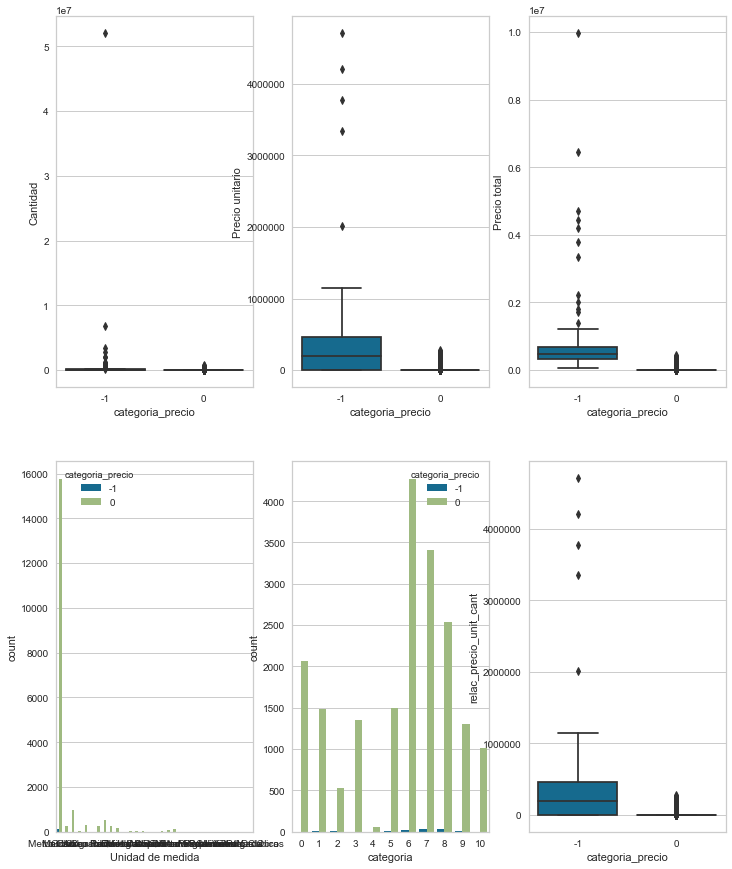

In [329]:
fig, axs = plt.subplots(2,3,figsize=(12,15))

sns.boxplot(x="categoria_precio", y="Cantidad", data=data_cluster_dbscan, ax=axs[0][0])
sns.boxplot(x="categoria_precio", y="Precio unitario", data=data_cluster_dbscan, ax=axs[0][1]) #Hacer relacion cantidad/precio
sns.boxplot(x="categoria_precio", y="Precio total", data=data_cluster_dbscan, ax=axs[0][2])

sns.countplot(hue="categoria_precio", x="Unidad de medida", data=data_cluster_dbscan, ax=axs[1][0])
sns.countplot(hue="categoria_precio", x="categoria", data=data_cluster_dbscan, ax=axs[1][1])
sns.boxplot(x="categoria_precio", y="relac_precio_unit_cant", data=data_cluster_dbscan, ax=axs[1][2])

fig.show()

In [328]:
data_cluster_dbscan[data_cluster_dbscan["categoria_precio"] == -1]

,Unnamed: 0,Proveedor,Entidad Contratante,Código de resolución,Código de contratación,Objeto contractual,Unidad de medida,Cantidad,Descripción compra por ítem,Precio unitario,Precio total,categoria,relac_precio_unit_cant,categoria_precio
0,0,MARTINEZ VELASQUEZ ISIDORO RICARDO,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00047,ADQUISICIÓN DE RESPIRADOR CON EFICIENCIA DE FI...,Unidad,2000000.0,RESPIRADOR CON EFICIENCIA DE FILTRACIÓN MÍNIMA...,4.98,9960000.00,6,2.490000e-06,-1
1,1,SUMINISTROS MEDICOS MANOSALVAS VILLAGOMEZ MV A...,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00045,ADQUISICIÓN DE 900000 PRUEBAS RÁPIDAS PARA LA ...,Unidad,900000.0,PRUEBAS RÁPIDAS PARA LA DETERMINACIÓN DE ANTIC...,7.15,6435000.00,8,7.944444e-06,-1
2,2,MILENIO LIMPIEZA Y MANTENIMIENTO S.A. MILIMAN,"GUAYAQUIL SIGLO XXI, FUNDACIÓN MUNICIPAL PARA ...",GSXXI-01-2020,GSXXI-01-2020-00001,PRESTACIÓN DE TRAPEADO Y SERVICIOS COMPLEMENTA...,Unidad,1.0,Limpieza en areas regeneradas,4709260.50,4709260.50,7,4.709260e+06,-1
3,3,CHICAIZA ALVARADO PEDRO GIOVANNY,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00006,ADQUISICIÓN DE MASCARILLAS QUIRURGICAS ELASTIC...,Unidad,6840000.0,MASCARILLA QUIRURGICA ELASTICO TAMAÑO ESTANDAR,0.65,4446000.00,2,9.502924e-08,-1
4,4,CONSORCIO CASUARINA,MUNICIPALIDAD DE GUAYAQUIL,CE-MIMG-003-2020,CE-MIMG-003-2020-00032,"EJECUCIÓN DE LOS TRABAJOS CIVILES, ESTRUCTURAL...",Unidad,1.0,NaN,4209650.90,4209650.90,8,4.209651e+06,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,297,SANCHEZ REYES ARMANDO EFRAIN,HOSPITAL GENERAL - MILAGRO,IESS-DG-AL-2020-032,IESS-DG-AL-2020-032-00005,ADQUISICION DE DISPOSITIVOS MEDICOS GORROS QUI...,Unidad,1.0,"GORROS QUIRURGICO, ZAPATOS QUIRURGICOS, MASCAR...",105380.00,105380.00,9,1.053800e+05,-1
317,317,YAGUANA TORRES DIANA MARYZEL,HOSPITAL GENERAL IBARRA,DG-AL-2020-032-RFDQ,DG-AL-2020-032-RFDQ-00004,ADQUISICION DE DISPOSITIVOS MEDICOS Y PRENDAS ...,Unidad,1.0,INSUMOS,98864.00,98864.00,9,9.886400e+04,-1
320,320,BAQUE MERCHAN TEOFILO ERASMO,HOSPITAL GENERAL DR. LIBORIO PANCHANA SOTOMAYOR,058-2020,058-2020-00003,ADQUISICION DE DISPOSITIVOS DE USO GENERAL PAR...,Unidad,1.0,COMPRA DE DISPOSITIVOS MEDICOS DE USO GENERAL ...,97642.57,97642.57,9,9.764257e+04,-1
474,474,IMPORTADORA Y DISTRIBUIDORA MEDICA FERBOVASA C...,HOSPITAL DE ESPECIALIDADES - TEODORO MALDONADO...,HTMC-GG-2020-0001-R,HTMC-GG-2020-0001-R-00013,ADQUISICION DE MEDICAMENTOS NO CATALOGADOS PAR...,Unidad,1080000.0,NaN,0.06,64800.00,8,5.555556e-08,-1


In [342]:
data_cluster_dbscan.groupby(["categoria"]).mean()

,Unnamed: 0,Cantidad,Precio unitario,Precio total,relac_precio_unit_cant,categoria_precio,media_Cantidad,media_Precio_unitario,media_relac_precio_unit_cant,media_Precio_total
categoria,,,,,,,,,,
0,10006.422201,1973.592050,718.666219,5956.948284,712.497452,-0.000969,1973.592050,718.666219,712.497452,5956.948284
1,9163.884358,4129.951203,6447.508469,12654.972447,6394.009489,-0.008021,4129.951203,6447.508469,6394.009489,12654.972447
2,10516.307116,26134.704457,1557.906030,14890.038333,1548.081414,-0.009363,26134.704457,1557.906030,1548.081414,14890.038333
3,10318.248521,3880.271080,809.657352,5241.725562,787.503346,-0.002219,3880.271080,809.657352,787.503346,5241.725562
4,11035.327273,962.690909,5.506909,828.096182,0.419226,0.000000,962.690909,5.506909,0.419226,828.096182
5,9975.946631,2002.661134,1026.385324,6899.642288,1010.748264,-0.004003,2002.661134,1026.385324,1010.748264,6899.642288
6,10277.941931,3061.789510,3819.178097,10336.255233,3767.761742,-0.003965,3061.789510,3819.178097,3767.761742,10336.255233
7,10434.329939,2010.021885,6212.435685,11063.881106,6126.509274,-0.009019,2010.021885,6212.435685,6126.509274,11063.881106
8,8512.267442,32542.054469,6440.764888,20907.549008,6260.277702,-0.014341,32542.054469,6440.764888,6260.277702,20907.549008


In [340]:
def agregar_medias(df):
    df['media_Cantidad'] = df['Cantidad'].groupby(df['categoria']).transform('mean')
    df['media_Precio_unitario'] = df['Precio unitario'].groupby(df['categoria']).transform('mean')
    df['media_relac_precio_unit_cant'] = df['relac_precio_unit_cant'].groupby(df['categoria']).transform('mean')
    df['media_Precio_total'] = df['Precio total'].groupby(df['categoria']).transform('mean')


In [339]:
data_cluster_dbscan

,Unnamed: 0,Proveedor,Entidad Contratante,Código de resolución,Código de contratación,Objeto contractual,Unidad de medida,Cantidad,Descripción compra por ítem,Precio unitario,Precio total,categoria,relac_precio_unit_cant,categoria_precio,media_Cantidad,media_Precio_unitario,media_relac_precio_unit_cant,media_Precio_total
0,0,MARTINEZ VELASQUEZ ISIDORO RICARDO,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00047,ADQUISICIÓN DE RESPIRADOR CON EFICIENCIA DE FI...,Unidad,2000000.00,RESPIRADOR CON EFICIENCIA DE FILTRACIÓN MÍNIMA...,4.98,9960000.0,6,2.490000e-06,-1,3061.789510,3819.178097,3767.761742,10336.255233
1,1,SUMINISTROS MEDICOS MANOSALVAS VILLAGOMEZ MV A...,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00045,ADQUISICIÓN DE 900000 PRUEBAS RÁPIDAS PARA LA ...,Unidad,900000.00,PRUEBAS RÁPIDAS PARA LA DETERMINACIÓN DE ANTIC...,7.15,6435000.0,8,7.944444e-06,-1,32542.054469,6440.764888,6260.277702,20907.549008
2,2,MILENIO LIMPIEZA Y MANTENIMIENTO S.A. MILIMAN,"GUAYAQUIL SIGLO XXI, FUNDACIÓN MUNICIPAL PARA ...",GSXXI-01-2020,GSXXI-01-2020-00001,PRESTACIÓN DE TRAPEADO Y SERVICIOS COMPLEMENTA...,Unidad,1.00,Limpieza en areas regeneradas,4709260.50,4709260.5,7,4.709260e+06,-1,2010.021885,6212.435685,6126.509274,11063.881106
3,3,CHICAIZA ALVARADO PEDRO GIOVANNY,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00006,ADQUISICIÓN DE MASCARILLAS QUIRURGICAS ELASTIC...,Unidad,6840000.00,MASCARILLA QUIRURGICA ELASTICO TAMAÑO ESTANDAR,0.65,4446000.0,2,9.502924e-08,-1,26134.704457,1557.906030,1548.081414,14890.038333
4,4,CONSORCIO CASUARINA,MUNICIPALIDAD DE GUAYAQUIL,CE-MIMG-003-2020,CE-MIMG-003-2020-00032,"EJECUCIÓN DE LOS TRABAJOS CIVILES, ESTRUCTURAL...",Unidad,1.00,NaN,4209650.90,4209650.9,8,4.209651e+06,-1,32542.054469,6440.764888,6260.277702,20907.549008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19613,19613,RODRIGUEZ TORRES WILMER ITALO,GOBIERNO PROVINCIAL DE PICHINCHA,26-DGSG-20,26-DGSG-20-00014,CONTRATO MODIFICATORIO PARA CORREGIR EL ERROR ...,Unidad,0.01,NaN,0.01,0.0,7,1.000000e+00,0,2010.021885,6212.435685,6126.509274,11063.881106
19614,19614,CUMPLIMIENTO A LA CIRCULAR NRO. SERCOP-SERCOP-...,MUNICIPIO DE PEDERNALES,061-OEAN-GADMCP-2020,061-OEAN-GADMCP-2020-00001,CUMPLIMIENTO A LA CIRCULAR NRO. SERCOP-SERCOP-...,Unidad,0.01,SERVICIOS PRESTADOS POR OTRAS ENTIDADES EXTRAT...,0.00,0.0,6,0.000000e+00,0,3061.789510,3819.178097,3767.761742,10336.255233
19615,19615,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,GOBIERNO AUTONOMO DESCENTRALIZADO DEL CANTON R...,GADMR-ALC-2020-031-R,GADMR-ALC-2020-031-R-00001,INFORME DUPLICACION DE PUBLICACION DE SITUACIO...,Global,1.00,INFORME DUPLICACION DE PUBLICACION DE SITUACIO...,0.00,0.0,6,0.000000e+00,0,3061.789510,3819.178097,3767.761742,10336.255233
19616,19616,ACLARATORIA,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,GADMSD-RWEA-2020-153,GADMSD-RWEA-2020-153-00001,CUMPLIMIENTO A LA CIRCULAR NRO. SERCOP-SERCOP-...,Unidad,1.00,cumplimiento a la Circular Nro. SERCOP-SERCOP-...,0.00,0.0,6,0.000000e+00,0,3061.789510,3819.178097,3767.761742,10336.255233


In [380]:
def standarize_by_categoria(df):
    min_max_scaler = StandardScaler()
    return min_max_scaler.fit_transform(df.values.astype(float).reshape(-1, 1)).reshape(1,-1)[0]
    



In [381]:
data_cluster_dbscan['standarized_Cantidad'] = data_cluster_dbscan['Cantidad'].groupby(data_cluster_dbscan['categoria']).transform(standarize_by_categoria)

In [384]:
data_cluster_dbscan

,Unnamed: 0,Proveedor,Entidad Contratante,Código de resolución,Código de contratación,Objeto contractual,Unidad de medida,Cantidad,Descripción compra por ítem,Precio unitario,Precio total,categoria,relac_precio_unit_cant,categoria_precio,media_Cantidad,media_Precio_unitario,media_relac_precio_unit_cant,media_Precio_total,standarized_Cantidad
0,0,MARTINEZ VELASQUEZ ISIDORO RICARDO,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00047,ADQUISICIÓN DE RESPIRADOR CON EFICIENCIA DE FI...,Unidad,2000000.00,RESPIRADOR CON EFICIENCIA DE FILTRACIÓN MÍNIMA...,4.98,9960000.0,6,2.490000e-06,-1,3061.789510,3819.178097,3767.761742,10336.255233,52.970976
1,1,SUMINISTROS MEDICOS MANOSALVAS VILLAGOMEZ MV A...,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00045,ADQUISICIÓN DE 900000 PRUEBAS RÁPIDAS PARA LA ...,Unidad,900000.00,PRUEBAS RÁPIDAS PARA LA DETERMINACIÓN DE ANTIC...,7.15,6435000.0,8,7.944444e-06,-1,32542.054469,6440.764888,6260.277702,20907.549008,0.843175
2,2,MILENIO LIMPIEZA Y MANTENIMIENTO S.A. MILIMAN,"GUAYAQUIL SIGLO XXI, FUNDACIÓN MUNICIPAL PARA ...",GSXXI-01-2020,GSXXI-01-2020-00001,PRESTACIÓN DE TRAPEADO Y SERVICIOS COMPLEMENTA...,Unidad,1.00,Limpieza en areas regeneradas,4709260.50,4709260.5,7,4.709260e+06,-1,2010.021885,6212.435685,6126.509274,11063.881106,-0.123606
3,3,CHICAIZA ALVARADO PEDRO GIOVANNY,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00006,ADQUISICIÓN DE MASCARILLAS QUIRURGICAS ELASTIC...,Unidad,6840000.00,MASCARILLA QUIRURGICA ELASTICO TAMAÑO ESTANDAR,0.65,4446000.0,2,9.502924e-08,-1,26134.704457,1557.906030,1548.081414,14890.038333,21.659781
4,4,CONSORCIO CASUARINA,MUNICIPALIDAD DE GUAYAQUIL,CE-MIMG-003-2020,CE-MIMG-003-2020-00032,"EJECUCIÓN DE LOS TRABAJOS CIVILES, ESTRUCTURAL...",Unidad,1.00,NaN,4209650.90,4209650.9,8,4.209651e+06,-1,32542.054469,6440.764888,6260.277702,20907.549008,-0.031630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19613,19613,RODRIGUEZ TORRES WILMER ITALO,GOBIERNO PROVINCIAL DE PICHINCHA,26-DGSG-20,26-DGSG-20-00014,CONTRATO MODIFICATORIO PARA CORREGIR EL ERROR ...,Unidad,0.01,NaN,0.01,0.0,7,1.000000e+00,0,2010.021885,6212.435685,6126.509274,11063.881106,-0.123667
19614,19614,CUMPLIMIENTO A LA CIRCULAR NRO. SERCOP-SERCOP-...,MUNICIPIO DE PEDERNALES,061-OEAN-GADMCP-2020,061-OEAN-GADMCP-2020-00001,CUMPLIMIENTO A LA CIRCULAR NRO. SERCOP-SERCOP-...,Unidad,0.01,SERVICIOS PRESTADOS POR OTRAS ENTIDADES EXTRAT...,0.00,0.0,6,0.000000e+00,0,3061.789510,3819.178097,3767.761742,10336.255233,-0.081217
19615,19615,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,GOBIERNO AUTONOMO DESCENTRALIZADO DEL CANTON R...,GADMR-ALC-2020-031-R,GADMR-ALC-2020-031-R-00001,INFORME DUPLICACION DE PUBLICACION DE SITUACIO...,Global,1.00,INFORME DUPLICACION DE PUBLICACION DE SITUACIO...,0.00,0.0,6,0.000000e+00,0,3061.789510,3819.178097,3767.761742,10336.255233,-0.081191
19616,19616,ACLARATORIA,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,GADMSD-RWEA-2020-153,GADMSD-RWEA-2020-153-00001,CUMPLIMIENTO A LA CIRCULAR NRO. SERCOP-SERCOP-...,Unidad,1.00,cumplimiento a la Circular Nro. SERCOP-SERCOP-...,0.00,0.0,6,0.000000e+00,0,3061.789510,3819.178097,3767.761742,10336.255233,-0.081191


In [357]:
data_cluster_dbscan['Cantidad'].groupby(data_cluster_dbscan['categoria'])

In [359]:
test = [[2.100e+02][6.500e+03][3.000e+01]]


TypeError: list indices must be integers or slices, not float